# Introduction [Radovan Kavicky - Explainable AI/ML (XAI) in Python] 1/2 (2nd part: https://colab.research.google.com/drive/1tHvEgHsMuWnrxGhdNZOrZr9ZynPZn78i?usp=sharing)

###  SHAP and Shapley sampling value COLAB/Jupyter Notebook 1/2

Welcome! 
We will first *explain* the **Shapley Sampling Value**, which is a foundational technique of Explainable AI/ML that one of the main tools/SHAP (SHapley Additive exPlanations) is built on. This notebook is a code-first walkthrough of the Shapley Sampling Value. You can find more information about the method in this paper (+request full-access): https://www.researchgate.net/publication/271795034_Explaining_prediction_models_and_individual_predictions_with_feature_contributions

#### **SAVE it/create a copy first (important)**
To work through this notebook, you can add it to your own account by going to **File > Save a Copy in Drive**. This will allow you to use it and follow along with the discussion of its contents.


# Install dependencies first & load scikit (+california housing dataset) 

In [ ]:
!pip install shap

# load the imports
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
# we will use random forest and shap later on
from sklearn.ensemble import RandomForestRegressor
import shap 
shap.initjs()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 4.8 MB/s eta 0:00:00


In [ ]:
# initialize model and load dataset as DataFrame (y-target values, x-set all columns as feature names)
mod = RandomForestRegressor()
data = housing
X = pd.DataFrame(data['data'])
y = data['target']
X.columns = data['feature_names']

# fit the model
mod.fit(X, y)

RandomForestRegressor()

In [ ]:
# Quick look at our dataset
X.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

The Shapley value is a solution concept used in game theory that involves fairly distributing both gains and costs to several actors working in coalition. It was introduced by Lloyd Shapley (economist, Nobel Prize laureate/The Sveriges Riksbank Prize in Economic Sciences in Memory of Alfred Nobel 2012, https://www.nobelprize.org/prizes/economic-sciences/2012/shapley/facts/) in 1953 [Shapley (1953): Shapley, Lloyd S. "A value for n-person games." Contributions to the Theory of Games 2.28 (1953): 307-317. https://www.rand.org/pubs/papers/P295.html]. 

More on Shapley value (Eyal Winter, 2002): https://web.archive.org/web/20061001143028/http://www.ma.huji.ac.il/~mseyal/shapley4to95.pdf + https://econpapers.repec.org/bookchap/eeegamchp/3-53.htm

The Shapley value can be defined as a function which uses only the marginal contributions of player as the arguments. The Shapley value not only has desirable properties, it is also the only payment rule satisfying some subset of these properties.

It is efficient, meaning that the sum of the payments equals the total worth of the coalition (in this context/game theory it is a group of players who work together to obtain a payoff). It is also symmetric, meaning that if two players have the same marginal contribution to every coalition, then they receive the same payment. The Shapley value is also additive, meaning that if two games are played independently, then the total payment is the sum of the payments in each game.

#### The Shapley Value (via/Source) https://christophm.github.io/interpretable-ml-book/shapley.html#the-shapley-value-in-detail 

The Shapley value is defined via a value function $val$ of players in S.

The Shapley value of a feature value is its contribution to the payout, weighted and summed over all possible feature value combinations:

$$\phi_j(val)=\sum_{S\subseteq\{1,\ldots,p\} \backslash \{j\}}\frac{|S|!\left(p-|S|-1\right)!}{p!}\left(val\left(S\cup\{j\}\right)-val(S)\right)$$

where S is a subset of the features used in the model, x is the vector of feature values of the instance to be explained and p the number of features.
$val_x(S)$ is the prediction for feature values in set S that are marginalized over features that are not included in set S:

$$val_{x}(S)=\int\hat{f}(x_{1},\ldots,x_{p})d\mathbb{P}_{x\notin{}S}-E_X(\hat{f}(X))$$

You actually perform multiple integrations for each feature that is not contained S.
A concrete example:
The machine learning model works with 4 features x1, x2, x3 and x4 and we evaluate the prediction for the coalition S consisting of feature values x1 and x3:

$$val_{x}(S)=val_{x}(\{1,3\})=\int_{\mathbb{R}}\int_{\mathbb{R}}\hat{f}(x_{1},X_{2},x_{3},X_{4})d\mathbb{P}_{X_2X_4}-E_X(\hat{f}(X))$$

This looks similar to the feature contributions in the linear model!

Do not get confused by the many uses of the word "value":
The feature value is the numerical or categorical value of a feature and instance;
the Shapley value is the feature contribution to the prediction;
the value function is the payout function for coalitions of players (feature values).

The Shapley value is the only attribution method that satisfies the properties **Efficiency**, **Symmetry**, **Dummy** and **Additivity**,  which together can be considered a definition of a fair payout.

**Efficiency**
The feature contributions must add up to the difference of prediction for x and the average.

$$\sum\nolimits_{j=1}^p\phi_j=\hat{f}(x)-E_X(\hat{f}(X))$$

**Symmetry**
The contributions of two feature values j and k should be the same if they contribute equally to all possible coalitions.
If

$$val(S \cup \{j\})=val(S\cup\{k\})$$

for all

$$S\subseteq\{1,\ldots, p\} \backslash \{j,k\}$$

then

$$\phi_j=\phi_{k}$$

**Dummy**
A feature j that does not change the predicted value -- regardless of which coalition of feature values it is added to -- should have a Shapley value of 0.
If

$$val(S\cup\{j\})=val(S)$$

for all

$$S\subseteq\{1,\ldots,p\}$$

then

$$\phi_j=0$$

**Additivity**
For a game with combined payouts val+val^+^ the respective Shapley values are as follows:

$$\phi_j+\phi_j^{+}$$

Suppose you trained a random forest, which means that the prediction is an average of many decision trees.
The Additivity property guarantees that for a feature value, you can calculate the Shapley value for each tree individually, average them, and get the Shapley value for the feature value for the random forest.


In [ ]:
# these are some of the variables we'll need for later on
cols         = X.columns.tolist()
shuffle_cols = cols.copy()  # these are the columns that we'll shuffle
M            = 1000 # number of iterations to calculate a Shapley value
idx          = range(X.shape[0])

In [ ]:
# just a sample that we're going to calculate shapley values for
x            = X.iloc[0]

# we will use this python object to store all of our shapley samples
shap_vals    = []

In [ ]:
# we will pick random sample from the dataset
idx_sample   = np.random.choice(idx)
j            = X.iloc[idx_sample]

In [ ]:
# in this case x is our 'base' sample
x

MedInc          8.325200
HouseAge       41.000000
AveRooms        6.984127
AveBedrms       1.023810
Population    322.000000
AveOccup        2.555556
Latitude       37.880000
Longitude    -122.230000
Name: 0, dtype: float64

In [ ]:
# in this case j is our randomly selected sample to compare it to
j

MedInc           3.482700
HouseAge        11.000000
AveRooms         5.072098
AveBedrms        1.049027
Population    3525.000000
AveOccup         2.541456
Latitude        35.320000
Longitude     -119.050000
Name: 2995, dtype: float64

In [ ]:
# we will do random shuffle here as for the columns of j to get a new ordering
np.random.shuffle(shuffle_cols)

# we will now order both of the samples by the new random order
j = j[shuffle_cols]
x = x[shuffle_cols]

In [ ]:
# we are here setting the values after the AveBedrms column to that of those in J
x_m_plus_j = x.copy()
x_m_plus_j['AveBedrms':] = j['AveBedrms':]
x_m_plus_j['AveBedrms'] = x['AveBedrms']

In [ ]:
# here is the new sample with value of AveBedrms from j that we swapped out for those in X
x_m_minus_j = x.copy()
x_m_minus_j['AveBedrms':] = j['AveBedrms':]

In [ ]:
# sample 1
x_m_plus_j

Latitude        37.880000
MedInc           8.325200
AveBedrms        1.023810
Population    3525.000000
AveRooms         5.072098
AveOccup         2.541456
Longitude     -119.050000
HouseAge        11.000000
Name: 0, dtype: float64

In [ ]:
# sample 2
x_m_minus_j

Latitude        37.880000
MedInc           8.325200
AveBedrms        1.049027
Population    3525.000000
AveRooms         5.072098
AveOccup         2.541456
Longitude     -119.050000
HouseAge        11.000000
Name: 0, dtype: float64

In [ ]:
# we will now re-order the columns for the model and reformat for model predictions
x_m_plus_j  = x_m_plus_j[cols].to_frame().T
x_m_minus_j = x_m_minus_j[cols].to_frame().T

In [ ]:
# now let's look at the prediction difference 
mod.predict(x_m_plus_j)[0] - mod.predict(x_m_minus_j)[0]

0.024560099999999974

The above cells calculated a shapley sampling value from just one permutation, but you would need to do this many times to eventually converge on the marginal contribution of the AveBedrms column for sample x.

If we take what we just did and put it into a loop then we can arrive at a final answer.

In [ ]:
# we will now run it in a whole loop
cols         = X.columns.tolist()
shuffle_cols = cols.copy()
M            = 500
idx          = range(X.shape[0])

# here is base sample to compare to
x            = X.iloc[0]

shap_vals    = []

for i in range(M):
  # this is random sample drawn from dataset in the iteration
  idx_sample   = np.random.choice(idx)
  j            = X.iloc[idx_sample]

  # let's randomly shuffle the columns of j to get a new ordering
  np.random.shuffle(shuffle_cols)

  # here order both of the samples by the new random order
  j = j[shuffle_cols]
  x = x[shuffle_cols]

  # we will set the values after the AveBedrms column to that of those in J
  x_m_plus_j = x.copy()
  x_m_plus_j['AveBedrms':] = j['AveBedrms':]
  x_m_plus_j['AveBedrms'] = x['AveBedrms']

  # now new sample with value of AveBedrms from j swapped out for those in X
  x_m_minus_j = x.copy()
  x_m_minus_j['AveBedrms':] = j['AveBedrms':]

  # and here re-order the columns for the model and reformat for model predictions
  x_m_plus_j  = x_m_plus_j[cols].to_frame().T
  x_m_minus_j = x_m_minus_j[cols].to_frame().T

  # we will append the difference in predictions
  shap_vals.append(mod.predict(x_m_plus_j)[0] - mod.predict(x_m_minus_j)[0])

In [ ]:
# this is final average shap value for this particular sample (as sum of all shap values)
sum(shap_vals) / M

-0.04693802059999903

To complete this exercise, we'll run a loop that will calculate the Shapley sampling values for each column within the dataset.

In [ ]:
# we will now run it for ALL columns
cols         = X.columns.tolist()
shuffle_cols = cols.copy()
M            = 1000
idx          = range(X.shape[0])

# this base sample to compare to
x            = X.iloc[2]

# here just storing the shap_vals that we will need at the end
shap_dict = {}

for col in cols:
    print(f"Finding SHAP values for: {col}")
    shap_vals = []
    for i in range(M):
      # iteration and random sample drawn from dataset
      idx_sample   = np.random.choice(idx)
      j            = X.iloc[idx_sample]

      # now let's randomly shuffle the columns of j to get a new ordering
      np.random.shuffle(shuffle_cols)

      # order both of the samples by the new random order
      j = j[shuffle_cols]
      x = x[shuffle_cols]

      # settin the values after the AveBedrms column to that of those in J
      x_m_plus_j       = x.copy()
      x_m_plus_j[col:] = j[col:]
      x_m_plus_j[col]  = x[col]

      # new sample with value of AveBedrms from j swapped out for those in X
      x_m_minus_j       = x.copy()
      x_m_minus_j[col:] = j[col:]

      # re-order the columns for the model and reformat for model predictions
      x_m_plus_j  = x_m_plus_j[cols].to_frame().T
      x_m_minus_j = x_m_minus_j[cols].to_frame().T

      # and append at the end as for the difference in predictions
      shap_vals.append(mod.predict(x_m_plus_j)[0] - mod.predict(x_m_minus_j)[0])

    shap_dict[col] = shap_vals

Finding SHAP values for: MedInc
Finding SHAP values for: HouseAge
Finding SHAP values for: AveRooms
Finding SHAP values for: AveBedrms
Finding SHAP values for: Population
Finding SHAP values for: AveOccup
Finding SHAP values for: Latitude
Finding SHAP values for: Longitude


In [ ]:
# This is our final output/results so let's put it into a DataFrame
shaps = pd.DataFrame(shap_dict)

shaps

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0    0.385280 -0.047710 -0.100940   0.070540    -0.11859 -0.777462 -0.288752   
1    0.045281 -0.001090  0.381761   0.022650     0.05669  0.020330 -0.252310   
2   -0.980766 -0.130910 -0.004700  -0.031380    -0.11714  0.232760 -0.088371   
3    1.748951  0.000000  0.360650   0.024790    -0.04033  0.012150 -1.044306   
4    2.030251  0.024920  0.098530   0.007650    -0.03649  0.067640 -1.033356   
..        ...       ...       ...        ...         ...       ...       ...   
995  2.635551  0.227031  0.100430  -0.008260    -0.13540  0.066120  1.050000   
996  2.650471  0.749023  0.203500   0.114450     0.26974 -0.001521 -0.284950   
997  2.190661  0.272630  0.190750   0.424460     0.07056  0.013420 -0.302782   
998  1.296261  0.059120  1.158742  -0.029350    -0.08919 -0.101421 -0.252520   
999  1.761470  0.475560  0.228111  -0.067371     0.00970 -0.159292  0.162420   

     Longitude  
0     -0.01723  
1     -1.39356  
2      0.54249  
3      0.43097  
4      0.98164  
..         ...  
995    0.01523  
996    0.26643  
997    0.26119  
998    0.16073  
999    0.32244  

[1000 rows x 8 columns]

In [ ]:
# here are shapley sampling values for this particular sample (as mean of shaps for each category)
shaps.mean()

MedInc        1.516836
HouseAge      0.137710
AveRooms      0.185321
AveBedrms     0.002741
Population   -0.031842
AveOccup     -0.041902
Latitude     -0.451448
Longitude     0.337932
dtype: float64

In [ ]:
# now we can calculate and add these values to the average value of the prediction to get your final final contribution
shaps.mean().sum() + mod.predict(X).mean()

3.727103445753296

In [ ]:
# now we can also compare to the actual predicted value
mod.predict(X[2:3])

array([3.7290306])

# Load California dataset directly from SHAP

In [ ]:
X,y = shap.datasets.california()
display(X.head())

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing 
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('Training Features Shape', X_train.shape)
print('Training Target Shape', y_train.shape)
print()
print('Testing Features Shape', X_test.shape)
print('Testing Target Shape', y_test.shape)

Training Features Shape (16512, 8)
Training Target Shape (16512,)

Testing Features Shape (4128, 8)
Testing Target Shape (4128,)


In [ ]:
# rather than use the whole training set to estimate expected values, we summarize with a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(X_train, 10)

def print_accuracy(f):
    print("Root mean squared test error = {0}".format(np.sqrt(np.mean((f(X_test) - y_test)**2))))
    time.sleep(0.5) # this is just explicit setting to let the print get out before any progress bars

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [ ]:
# We will train just basic linear regression model
from sklearn import linear_model
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

import time

# and evaluate the model
print_accuracy(lin_regr.predict)

Root mean squared test error = 0.7273129773603114


In [ ]:
# here we are starting to explain a single prediction

shap.initjs()

ex = shap.KernelExplainer(lin_regr.predict, X_train_summary)
shap_values = ex.shap_values(X_test.iloc[0,:])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0,:])

X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names


In [ ]:
# Explain a single prediction

shap.initjs()
shap_values = ex.shap_values(X_test.iloc[45,:])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[45,:])

X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names


Shap calculation has exponential computational complexity with growing # of features

  0%|          | 0/4128 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted 

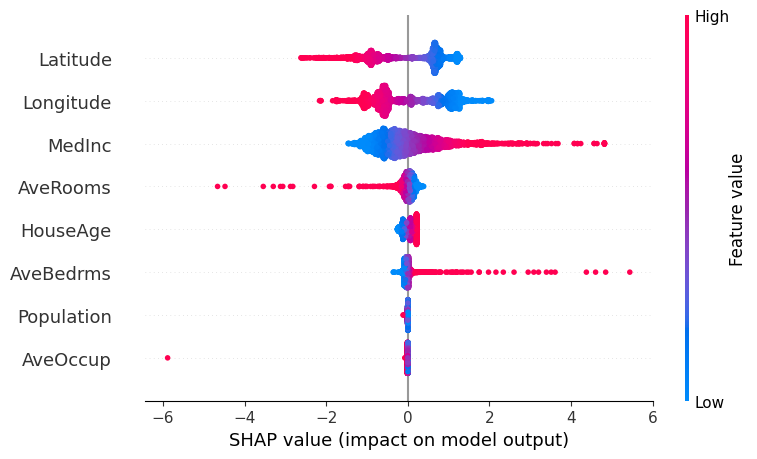

In [ ]:
# This will take a long time... so get ready to wait for a while before running it...
shap.initjs()

shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

import warnings  
warnings.filterwarnings(action = "ignore")

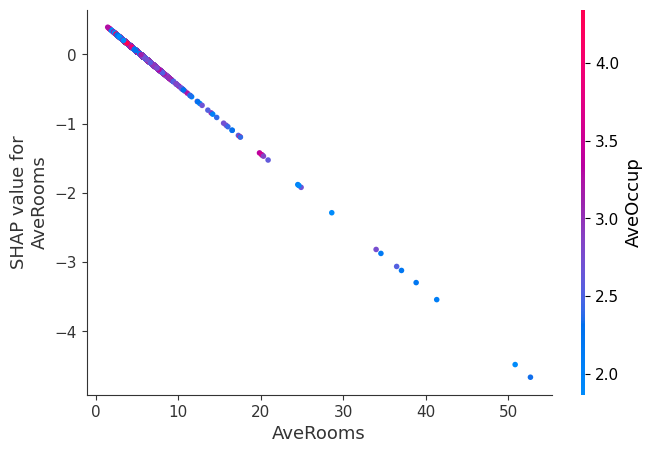

In [ ]:
shap.dependence_plot("AveRooms", shap_values, X_test)

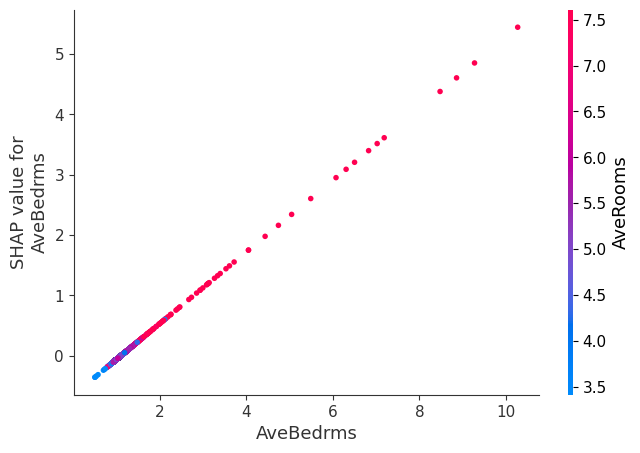

In [ ]:
shap.dependence_plot("AveBedrms", shap_values, X_test)

# Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0)
rforest.fit(X_train, y_train)
print_accuracy(rforest.predict)

Root mean squared test error = 0.5092208279121668


# Explanation for Random Forrest

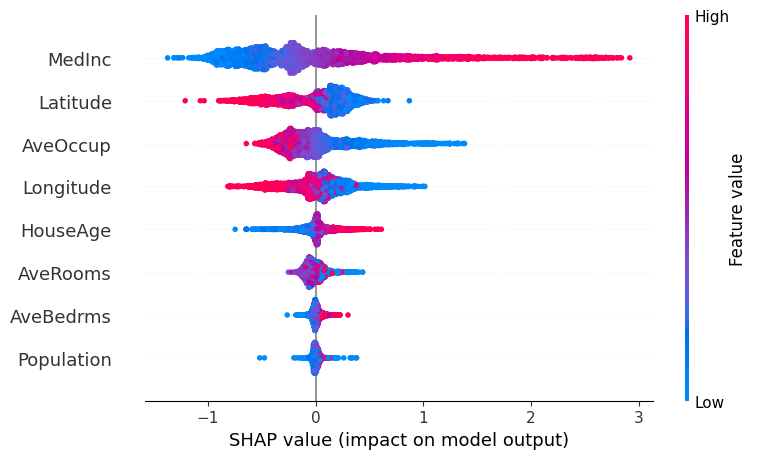

In [ ]:
# here we can explain all the predictions in the test set
explainer = shap.TreeExplainer(rforest)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

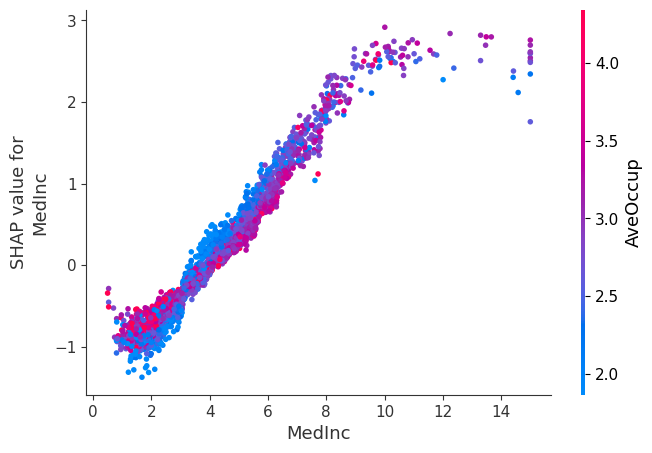

In [ ]:
shap.dependence_plot("MedInc", shap_values, X_test)

In [ ]:
# Here again... it will take a long time to run & re-run this...

shap.initjs()

shap.force_plot(ex.expected_value, shap_values, X_test)

# Sources

Shapley (1953): Shapley, Lloyd S. "A value for n-person games." Contributions to the Theory of Games 2.28 (1953): 307-317. https://www.rand.org/pubs/papers/P295.html

Strumbelj (2014): Štrumbelj, Erik, and Igor Kononenko. "Explaining prediction models and individual predictions with feature contributions." Knowledge and information systems 41.3 (2014): 647-665. https://www.scribd.com/document/553370546/Explaining-prediction-models-and-individual-predictions-with-feature-contributions

Lundberg (2017): Lundberg, Scott M., and Su-In Lee. "A unified approach to interpreting model predictions." Advances in Neural Information Processing Systems (2017). https://arxiv.org/abs/1705.07874

Sundararajan (2019): Sundararajan, Mukund, and Amir Najmi. "The many Shapley values for model explanation." arXiv preprint arXiv:1908.08474 (2019). https://arxiv.org/abs/1908.08474#


### Shapley 3 **level**



---
